# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [16]:
# Import the titanic dataset here

import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

df_titanic


,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [17]:
# Code here

df_titanic["type"] = df_titanic["class"].map({
    "1st": "1st class",
    "2nd": "2nd class",
    "3rd": "3rd class",
})

df_titanic["type"].dropna()

pd.crosstab(df_titanic["type"], df_titanic["embarked"])


embarked,B,C,Q,S
type,,,,
1st class,3,143,3,175
2nd class,6,26,7,245
3rd class,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [18]:
# Code here
pd.crosstab(df_titanic["embarked"], df_titanic["type"], normalize='columns')


type,1st class,2nd class,3rd class
embarked,,,
B,0.009259,0.021127,0.000000
C,0.441358,0.091549,0.143865
Q,0.009259,0.024648,0.159379
S,0.540123,0.862676,0.696756


In [19]:
pd.crosstab(df_titanic["type"], df_titanic["embarked"], normalize='columns')



embarked,B,C,Q,S
type,,,,
1st class,0.333333,0.527675,0.024390,0.191466
2nd class,0.666667,0.095941,0.056911,0.268053
3rd class,0.000000,0.376384,0.918699,0.540481


1) 69.67% of passengers in 3rd class embarked at Southampton.
2) 54.05% of Southampton passengers were in 3rd class.

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

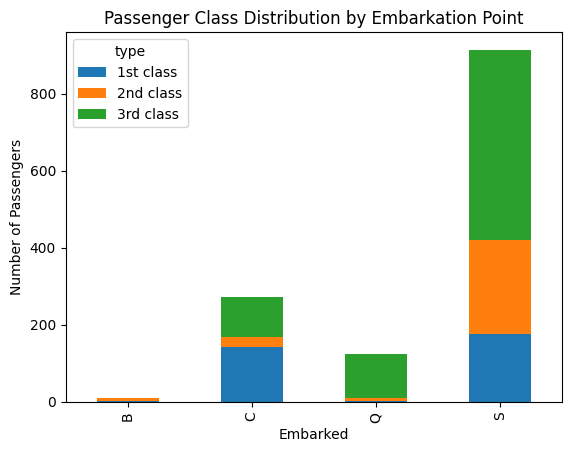

In [21]:
# Code here

import pandas as pd
import matplotlib.pyplot as plt

embarked_class = df_titanic.groupby(['embarked', 'type']).size().unstack()

embarked_class.plot(kind='bar', stacked=True)

plt.xlabel('Embarked')
plt.ylabel('Number of Passengers')
plt.title('Passenger Class Distribution by Embarkation Point')

plt.show()

#Chat GPT was used to determine the best data visualization for this case and to fix errors during the coding of the graph.

The visualization gives us a more visual approach to how the different classes of passengers are spread across the cities they embarked from, but it's hard to see concrete probabilities. The distributions above give us numeric values to determine where passengers are concentrated and where they are not.